In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.metrics import confusion_matrix

In [2]:
df1 = pd.read_csv("C:/Users/Nithya/Downloads/first_batchNLTKDONE.csv")
df1 = df1[df1["Popularity"] == 1]
df2 = pd.read_csv("C:/Users/Nithya/Downloads/second_batchNLTKDONE.csv")
df3 = pd.read_csv("C:/Users/Nithya/Downloads/second_batchNLTKDONE.csv")
df3 = df3[df3["Popularity"] == 1]
df4 = pd.read_csv("C:/Users/Nithya/Downloads/fourth_batchNLTKDONE.csv")
df4 = df4[df4["Popularity"] == 1]
df5 = pd.read_csv("C:/Users/Nithya/Downloads/fifth_batchNLTKDONE.csv")
#DELETE FOR THE FUTURE


frames = [df1, df2, df3, df4, df5]
book_dtf = pd.concat(frames)


In [3]:
book_dtf

,Unnamed: 0,Unnamed: 0.1,Popularity,User_Reviews,Stars_Ratings,Diff_Ratings,Num_Tokenized_Words,Average_WordLength,Average_WordsinSentence,Percentage_Verbs,Percentage_Nouns,Percentage_AdjAdverb,Quote,Sentiment_Score,Tokenized_Words
15,15,15.0,1,18,3,-0.44,82,3.390244,11.714286,0.158537,0.207317,0.158537,False,0.9564,"['first', 'touch', 'boring', 'little', 'hard',..."
17,17,17.0,1,18,4,-0.11,18,4.111111,18.000000,0.055556,0.333333,0.222222,False,0.3236,"['quite', 'romance', 'prefer', 'first', 'book'..."
24,24,24.0,1,10,5,0.79,247,4.623482,19.000000,0.149798,0.226721,0.222672,False,0.9822,"['beginning', 'almost', 'give', 'book', 'fifth..."
43,43,43.0,1,464,4,-0.20,242,3.962810,17.285714,0.231405,0.231405,0.157025,False,0.9306,"['carry', 'series', 'healthy', 'exercise', 'lo..."
55,55,55.0,1,464,2,-2.16,32,4.687500,10.666667,0.187500,0.281250,0.250000,False,-0.5477,"['disturbing', 'read', 'upset', 'book', 'many'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29082,29082,29082.0,0,1,3,-0.57,67,3.880597,11.166667,0.253731,0.179104,0.194030,False,-0.9821,"['want', 'give', 'star', 'felt', 'need', 'stor..."
29083,29083,29083.0,0,1,5,0.44,87,3.574713,21.750000,0.206897,0.183908,0.206897,False,0.8472,"['ok', 'love', 'whole', 'fake', 'relationship'..."
29084,29084,29084.0,1,1,5,0.70,526,4.323194,12.829268,0.178707,0.273764,0.138783,False,0.9939,"['love', 'return', 'lavender', 'shore', 'bring..."
29085,29085,29085.0,0,1,5,0.53,135,4.577778,22.500000,0.133333,0.229630,0.185185,False,-0.7011,"['heartbreaking', 'chilling', 'hypnotically', ..."


In [4]:
book_dtf["Popularity"].value_counts()

0    431870
1    376732
Name: Popularity, dtype: int64

In [ ]:
#Changing the True or False of Quote to numeric number
#0 = False, 1 = True

#book_dtf["Quote"] = book_dtf["Quote"].astype(int)

## 1. Analysing the most used words in book reviews

In [5]:
book_dtf["Tokenized_Words"].describe()

count                 808602
unique                708073
top       ['review', 'come']
freq                     744
Name: Tokenized_Words, dtype: object

In [6]:
book_dtf["Tokenized_Words"].nunique()

708073

The dataset has 708073 unique words. The rest duplicates, so we are going to count the most frequently occuring word

In [7]:
#creating a new dataframe newdtf to store the top 15 most used words in book reviews
from collections import Counter
newdtf=pd.DataFrame(Counter(" ".join(book_dtf["Tokenized_Words"]).split()).most_common(15))
newdtf

,0,1
0,"'book',",1795808
1,"'read',",936700
2,"'story',",819893
3,"'like',",804162
4,"'one',",775465
5,"'love',",728521
6,"'character',",628571
7,"'get',",589985
8,"'make',",535190
9,"'really',",487981


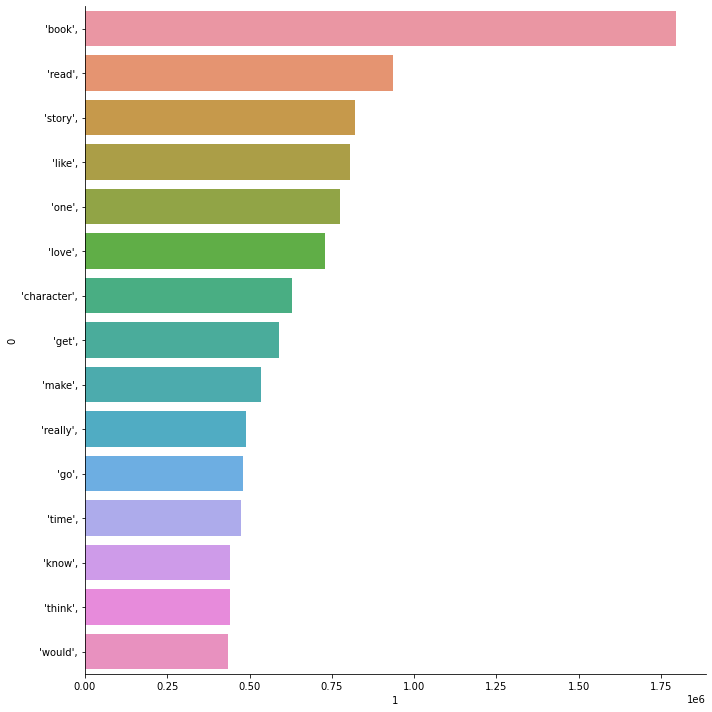

In [8]:
#visualising the most used words in a catplot
sb.catplot(x=1,
            y=0,
            data=newdtf,
            kind='bar',
            order=newdtf[0],
            ci=None,height=10)


'book' is the most frequent word in the dataset, followed by 'read', 'story', 'like' and 'one'

## 2. Checking whether the sentiment score affects Stars Rating



In [9]:
book_dtf["Sentiment_Score"].describe()

count    808602.000000
mean          0.570025
std           0.622702
min          -1.000000
25%           0.438900
50%           0.903200
75%           0.982000
max           1.000000
Name: Sentiment_Score, dtype: float64

sentiment score is a column in the dataset that stores the tone of the book review is. its range is from -1 to 1. a sentiment score above 0 indicates a positive review and below 0 indicates a negative review

In [10]:
print(book_dtf["Sentiment_Score"].corr(book_dtf['Stars_Ratings']))

0.2449332291257995


<AxesSubplot:xlabel='Stars_Ratings', ylabel='Sentiment_Score'>

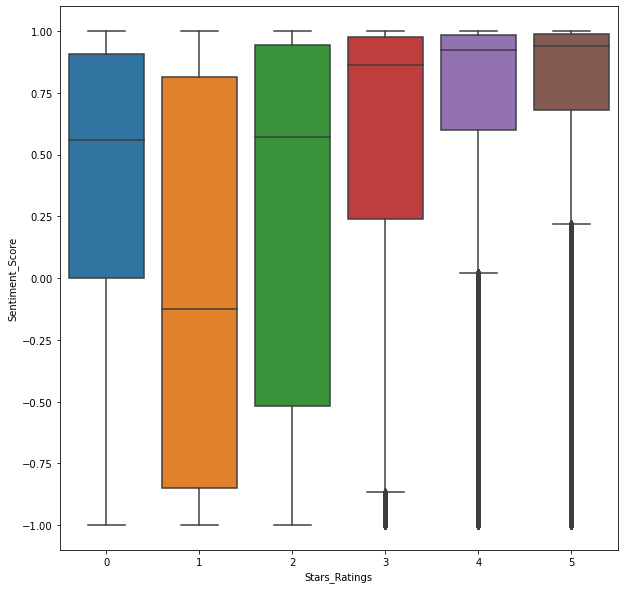

In [11]:
f = plt.figure(figsize=(10, 10))
sb.boxplot(x = 'Stars_Ratings', y = 'Sentiment_Score', data = book_dtf)

from the boxplot between stars ratings and sentiment score we can see that the book reviews with a more positive sentiment score display higher star rating for example book reviews with rating 4 or 5 do not have much of a negative sentiment score  

## 3. Analysis of Numeric Variables with Popularity

In [12]:
#list of all the columns in the dataset
book_dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808602 entries, 15 to 29086
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               808602 non-null  int64  
 1   Unnamed: 0.1             214966 non-null  float64
 2   Popularity               808602 non-null  int64  
 3   User_Reviews             808602 non-null  int64  
 4   Stars_Ratings            808602 non-null  int64  
 5   Diff_Ratings             808602 non-null  float64
 6   Num_Tokenized_Words      808602 non-null  int64  
 7   Average_WordLength       808225 non-null  float64
 8   Average_WordsinSentence  808602 non-null  float64
 9   Percentage_Verbs         808225 non-null  float64
 10  Percentage_Nouns         808225 non-null  float64
 11  Percentage_AdjAdverb     808225 non-null  float64
 12  Quote                    808602 non-null  bool   
 13  Sentiment_Score          808602 non-null  float64
 14  Toke

In [13]:
#creating a dataframe to store the numerical variables to compare with popularity
numerical_data= pd.DataFrame(book_dtf[['User_Reviews','Diff_Ratings','Num_Tokenized_Words' ,'Average_WordLength','Average_WordsinSentence','Percentage_Verbs','Percentage_Nouns','Percentage_AdjAdverb','Sentiment_Score','Popularity']])
numerical_data


,User_Reviews,Diff_Ratings,Num_Tokenized_Words,Average_WordLength,Average_WordsinSentence,Percentage_Verbs,Percentage_Nouns,Percentage_AdjAdverb,Sentiment_Score,Popularity
15,18,-0.44,82,3.390244,11.714286,0.158537,0.207317,0.158537,0.9564,1
17,18,-0.11,18,4.111111,18.000000,0.055556,0.333333,0.222222,0.3236,1
24,10,0.79,247,4.623482,19.000000,0.149798,0.226721,0.222672,0.9822,1
43,464,-0.20,242,3.962810,17.285714,0.231405,0.231405,0.157025,0.9306,1
55,464,-2.16,32,4.687500,10.666667,0.187500,0.281250,0.250000,-0.5477,1
...,...,...,...,...,...,...,...,...,...,...
29082,1,-0.57,67,3.880597,11.166667,0.253731,0.179104,0.194030,-0.9821,0
29083,1,0.44,87,3.574713,21.750000,0.206897,0.183908,0.206897,0.8472,0
29084,1,0.70,526,4.323194,12.829268,0.178707,0.273764,0.138783,0.9939,1
29085,1,0.53,135,4.577778,22.500000,0.133333,0.229630,0.185185,-0.7011,0


In [14]:
numerical_data.describe()

,User_Reviews,Diff_Ratings,Num_Tokenized_Words,Average_WordLength,Average_WordsinSentence,Percentage_Verbs,Percentage_Nouns,Percentage_AdjAdverb,Sentiment_Score,Popularity
count,808602.000000,808602.000000,808602.000000,808225.000000,808602.000000,808225.000000,808225.000000,808225.000000,808602.000000,808602.000000
mean,204.422130,-0.123898,220.593298,4.301666,16.179469,0.192520,0.235131,0.171565,0.570025,0.465905
std,280.321807,1.203613,250.419429,0.441569,8.316881,0.051668,0.062312,0.065605,0.622702,0.498837
min,1.000000,-5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,32.000000,-0.750000,55.000000,4.074627,11.666667,0.168224,0.204082,0.138889,0.438900,0.000000
50%,96.000000,0.100000,142.000000,4.277354,15.476190,0.192509,0.230769,0.163636,0.903200,0.000000
75%,246.000000,0.800000,301.000000,4.497797,19.636364,0.216216,0.259740,0.193277,0.982000,1.000000
max,1774.000000,3.090000,3868.000000,61.500000,738.000000,1.000000,1.000000,1.000000,1.000000,1.000000


                         User_Reviews  Diff_Ratings  Num_Tokenized_Words  \
User_Reviews                 1.000000     -0.036739             0.179935   
Diff_Ratings                -0.036739      1.000000             0.021341   
Num_Tokenized_Words          0.179935      0.021341             1.000000   
Average_WordLength          -0.029022      0.059886             0.038462   
Average_WordsinSentence      0.051500      0.011646             0.240709   
Percentage_Verbs             0.003418     -0.045422             0.005525   
Percentage_Nouns            -0.020047      0.039298            -0.069178   
Percentage_AdjAdverb        -0.043765     -0.025264            -0.148598   
Sentiment_Score              0.041857      0.235739             0.056257   
Popularity                   0.262383      0.005478             0.195347   

                         Average_WordLength  Average_WordsinSentence  \
User_Reviews                      -0.029022                 0.051500   
Diff_Ratings       

<AxesSubplot:>

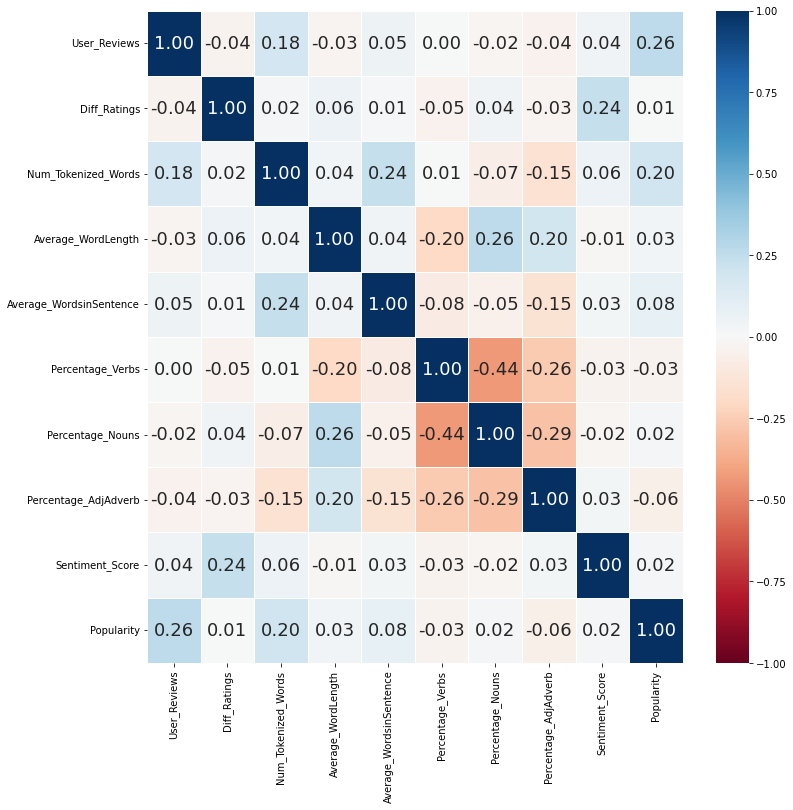

In [15]:
print(numerical_data.corr())
f = plt.figure(figsize=(12, 12))
sb.heatmap(numerical_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

<AxesSubplot:xlabel='Popularity', ylabel='User_Reviews'>

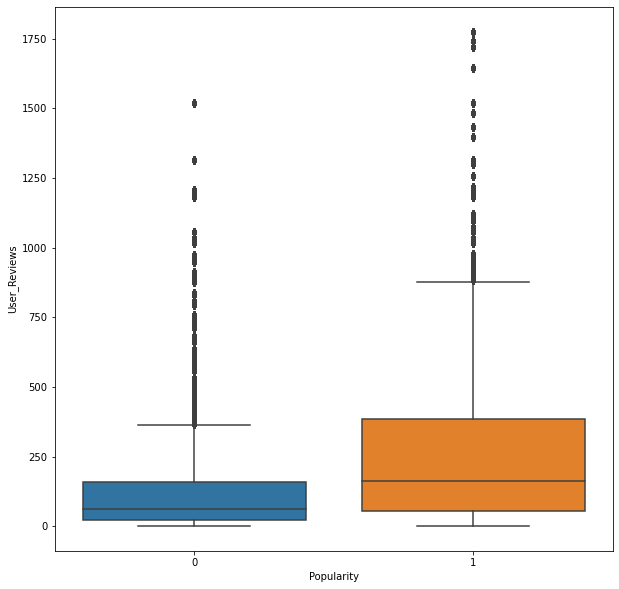

In [16]:
f = plt.figure(figsize=(10,10))
sb.boxplot(x = 'Popularity' , y = 'User_Reviews', data = book_dtf)

more user reviews are there for popular books

<AxesSubplot:xlabel='Popularity', ylabel='Num_Tokenized_Words'>

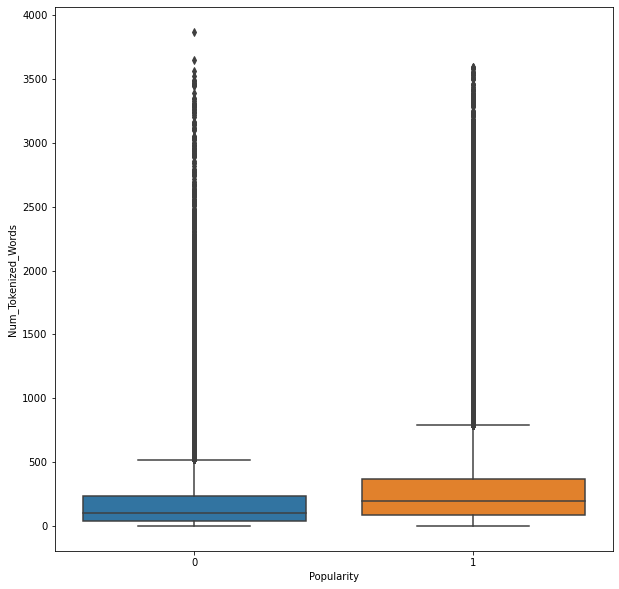

In [17]:
f = plt.figure(figsize=(10,10))
sb.boxplot(x = 'Popularity' , y = 'Num_Tokenized_Words', data = book_dtf)

<AxesSubplot:xlabel='Popularity', ylabel='Average_WordsinSentence'>

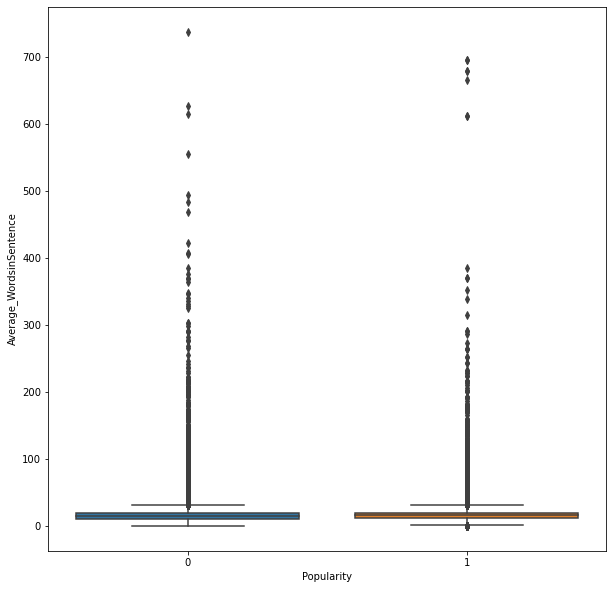

In [53]:
f = plt.figure(figsize=(10,10))
sb.boxplot(x = 'Popularity' , y = 'Average_WordsinSentence', data = book_dtf)

<AxesSubplot:xlabel='Popularity', ylabel='Sentiment_Score'>

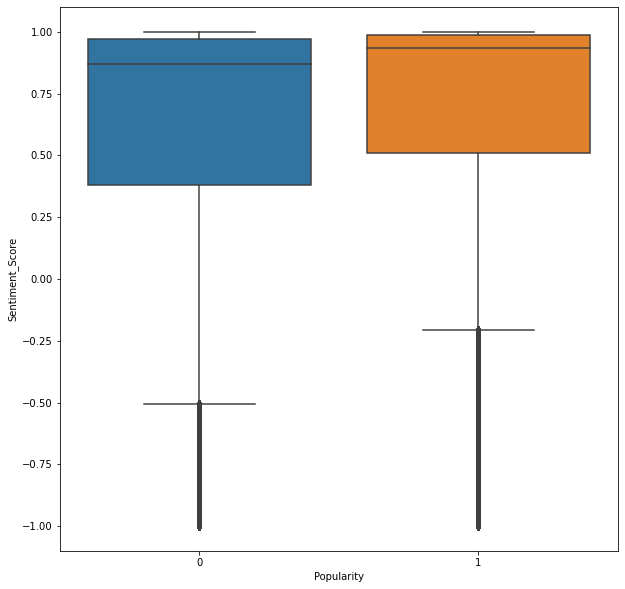

In [19]:
f = plt.figure(figsize=(10,10))
sb.boxplot(x = 'Popularity' , y = 'Sentiment_Score', data = book_dtf)

## 4. Analysis of Categorical Variables with Popularity

In [23]:
categorical_data= pd.DataFrame(book_dtf[['Tokenized_Words','Quote','Popularity','Stars_Ratings']])
categorical_data

,Tokenized_Words,Quote,Popularity,Stars_Ratings
15,"['first', 'touch', 'boring', 'little', 'hard',...",False,1,3
17,"['quite', 'romance', 'prefer', 'first', 'book'...",False,1,4
24,"['beginning', 'almost', 'give', 'book', 'fifth...",False,1,5
43,"['carry', 'series', 'healthy', 'exercise', 'lo...",False,1,4
55,"['disturbing', 'read', 'upset', 'book', 'many'...",False,1,2
...,...,...,...,...
29082,"['want', 'give', 'star', 'felt', 'need', 'stor...",False,0,3
29083,"['ok', 'love', 'whole', 'fake', 'relationship'...",False,0,5
29084,"['love', 'return', 'lavender', 'shore', 'bring...",False,1,5
29085,"['heartbreaking', 'chilling', 'hypnotically', ...",False,0,5


In [24]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808602 entries, 15 to 29086
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Tokenized_Words  808602 non-null  object
 1   Quote            808602 non-null  bool  
 2   Popularity       808602 non-null  int64 
 3   Stars_Ratings    808602 non-null  int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 57.7+ MB


<AxesSubplot:>

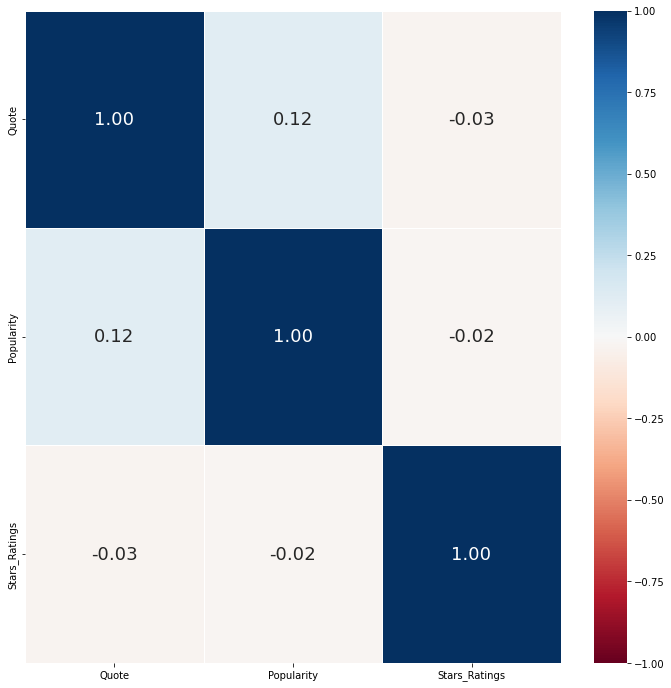

In [47]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(categorical_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

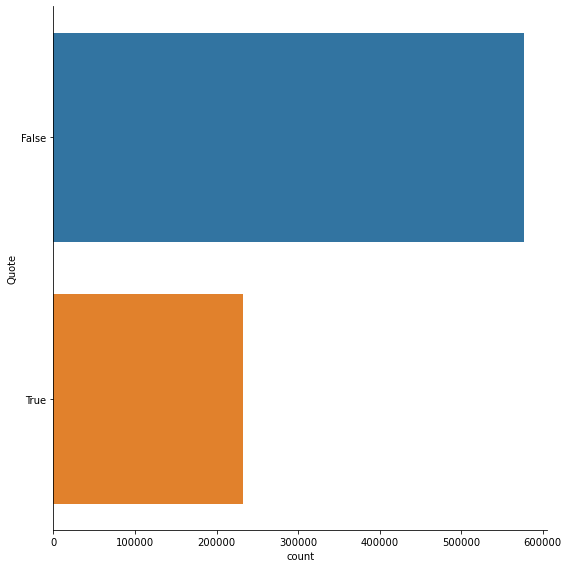

In [34]:
sb.catplot(y = 'Quote', data = categorical_data, 
           kind = "count", 
           height = 8, 
           order = categorical_data['Quote'].value_counts().index)

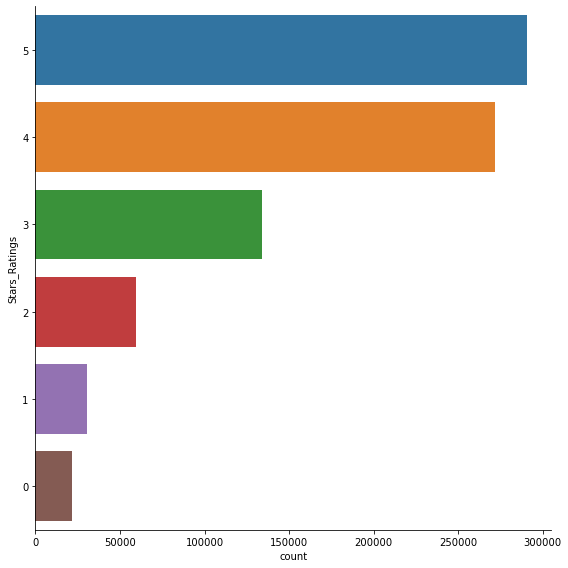

In [49]:
sb.catplot(y = 'Stars_Ratings', data = categorical_data, 
           kind = "count", 
           height = 8, 
           order = categorical_data['Stars_Ratings'].value_counts().index)